In [1]:
# pylint: disable=invalid-name

In [2]:
import sys
import os
import logging
import gymnasium as gym
import cyberbattle.agents.baseline.learner as learner
import cyberbattle.agents.baseline.plotting as p
import cyberbattle.agents.baseline.agent_wrapper as w
import cyberbattle.agents.baseline.agent_randomcredlookup as rca
import cyberbattle.agents.baseline.agent_tabularqlearning as tqa
import cyberbattle.agents.baseline.agent_dql as dqla
import cyberbattle.agents.baseline.agent_drqn as drqn
from cyberbattle.agents.baseline.agent_wrapper import Verbosity
from cyberbattle._env.cyberbattle_env import CyberBattleEnv

logging.basicConfig(stream=sys.stdout, level=logging.ERROR, format="%(levelname)s: %(message)s")

In [3]:
%matplotlib inline

In [4]:
# Papermill notebook parameters
gymid = "CyberBattleChain-v0"
env_size = 10
iteration_count = 9000
training_episode_count = 50
eval_episode_count = 5
maximum_node_count = 22
maximum_total_credentials = 22
plots_dir = "output/plots"

In [5]:
# Parameters
gymid = "CyberBattleChain-v0"
iteration_count = 200
training_episode_count = 20
eval_episode_count = 3
maximum_node_count = 20
maximum_total_credentials = 20
env_size = 10
plots_dir = "notebooks/output/baseline_random/plots"


In [6]:
os.makedirs(plots_dir, exist_ok=True)

# Load the Gym environment
if env_size:
    _gym_env = gym.make(gymid, size=env_size)
else:
    _gym_env = gym.make(gymid)

from typing import cast

gym_env = cast(CyberBattleEnv, _gym_env.unwrapped)
assert isinstance(gym_env, CyberBattleEnv), f"Expected CyberBattleEnv, got {type(gym_env)}"

ep = w.EnvironmentBounds.of_identifiers(maximum_node_count=maximum_node_count, maximum_total_credentials=maximum_total_credentials, identifiers=gym_env.identifiers)

In [7]:
debugging = False
if debugging:
    print(f"port_count = {ep.port_count}, property_count = {ep.property_count}")

    gym_env.environment
    # training_env.environment.plot_environment_graph()
    gym_env.environment.network.nodes
    gym_env.action_space
    gym_env.action_space.sample()
    gym_env.observation_space.sample()
    o0, _ = gym_env.reset()
    o_test, r, d, t, i = gym_env.step(gym_env.sample_valid_action())
    o0, _ = gym_env.reset()

    o0.keys()

    fe_example = w.RavelEncoding(ep, [w.Feature_active_node_properties(ep), w.Feature_discovered_node_count(ep)])
    a = w.StateAugmentation(o0)
    w.Feature_discovered_ports(ep).get(a)
    fe_example.encode_at(a, 0)

In [8]:
# Evaluate the random agent
random_run = learner.epsilon_greedy_search(
    gym_env,
    ep,
    learner=learner.RandomPolicy(),
    episode_count=eval_episode_count,
    iteration_count=iteration_count,
    epsilon=1.0,  # purely random
    render=False,
    verbosity=Verbosity.Quiet,
    plot_episodes_length=False,
    render_last_episode_rewards_to=os.path.join(plots_dir, f"random-{gymid}"),
    title="Random search",
)

###### Random search
Learning with: episode_count=3,iteration_count=200,ϵ=1.0,ϵ_min=0.0, 
  ## Episode: 1/3 'Random search' ϵ=1.0000, 


Episode 1|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 1|Iteration 5|reward:   14.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  114.0|last_reward_at:    5|Elapsed Time: 0:00:00||

Episode 1|Iteration 8|reward:  114.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  125.0|last_reward_at:    8|Elapsed Time: 0:00:00||

Episode 1|Iteration 10|reward:  125.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  133.0|last_reward_at:   10|Elapsed Time: 0:00:00||

Episode 1|Iteration 11|reward:  133.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  139.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 1|Iteration 14|reward:  139.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  141.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 1|Iteration 16|reward:  141.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  143.0|last_reward_at:   16|Elapsed Time: 0:00:00||

Episode 1|Iteration 29|reward:  143.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  152.0|last_reward_at:   29|Elapsed Time: 0:00:00||

Episode 1|Iteration 45|reward:  152.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  252.0|last_reward_at:   45|Elapsed Time: 0:00:00||

Episode 1|Iteration 125|reward:  252.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  266.0|last_reward_at:  125|Elapsed Time: 0:00:00||

Episode 1|Iteration 131|reward:  266.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  270.0|last_reward_at:  131|Elapsed Time: 0:00:00||

Episode 1|Iteration 157|reward:  270.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  272.0|last_reward_at:  157|Elapsed Time: 0:00:00||

Episode 1|Iteration 171|reward:  272.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  278.0|last_reward_at:  171|Elapsed Time: 0:00:00||

Episode 1|Iteration 191|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||

Episode 1|Iteration 200|reward:  278.0|last_reward_at:  191|Elapsed Time: 0:00:00||

  Episode 1 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/46 (0.10)
    explore-remote: 6/73 (0.08)
    explore-connect: 2/68 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 2/3 'Random search' ϵ=1.0000, 


Episode 2|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 2|Iteration 9|reward:   14.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   16.0|last_reward_at:    9|Elapsed Time: 0:00:00||

Episode 2|Iteration 14|reward:   16.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 2|Iteration 15|reward:   20.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  120.0|last_reward_at:   15|Elapsed Time: 0:00:00||

Episode 2|Iteration 26|reward:  120.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  134.0|last_reward_at:   26|Elapsed Time: 0:00:00||

Episode 2|Iteration 39|reward:  134.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  140.0|last_reward_at:   39|Elapsed Time: 0:00:00||

Episode 2|Iteration 50|reward:  140.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  148.0|last_reward_at:   50|Elapsed Time: 0:00:00||

Episode 2|Iteration 55|reward:  148.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  154.0|last_reward_at:   55|Elapsed Time: 0:00:00||

Episode 2|Iteration 58|reward:  154.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  254.0|last_reward_at:   58|Elapsed Time: 0:00:00||

Episode 2|Iteration 67|reward:  254.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  268.0|last_reward_at:   67|Elapsed Time: 0:00:00||

Episode 2|Iteration 83|reward:  268.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  272.0|last_reward_at:   83|Elapsed Time: 0:00:00||

Episode 2|Iteration 84|reward:  272.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  274.0|last_reward_at:   84|Elapsed Time: 0:00:00||

Episode 2|Iteration 90|reward:  274.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  280.0|last_reward_at:   90|Elapsed Time: 0:00:00||

Episode 2|Iteration 92|reward:  280.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  380.0|last_reward_at:   92|Elapsed Time: 0:00:00||

Episode 2|Iteration 108|reward:  380.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:  394.0|last_reward_at:  108|Elapsed Time: 0:00:00||

Episode 2|Iteration 122|reward:  394.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 2|Iteration 138|reward:  494.0|last_reward_at:  122|Elapsed Time: 0:00:00||

Episode 2|Iteration 138|reward:  494.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  500.0|last_reward_at:  138|Elapsed Time: 0:00:00||

Episode 2|Iteration 142|reward:  500.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  506.0|last_reward_at:  142|Elapsed Time: 0:00:00||

Episode 2|Iteration 158|reward:  506.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward:  517.0|last_reward_at:  158|Elapsed Time: 0:00:00||

Episode 2|Iteration 165|reward:  517.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward:  521.0|last_reward_at:  165|Elapsed Time: 0:00:00||

Episode 2|Iteration 166|reward:  521.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  523.0|last_reward_at:  166|Elapsed Time: 0:00:00||

Episode 2|Iteration 167|reward:  523.0|last_reward_at:  167|Elapsed Time: 0:00:00||

Episode 2|Iteration 200|reward:  523.0|last_reward_at:  167|Elapsed Time: 0:00:00||

  Episode 2 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 7/46 (0.13)
    explore-remote: 10/63 (0.14)
    explore-connect: 4/70 (0.05)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
  ## Episode: 3/3 'Random search' ϵ=1.0000, 


Episode 3|Iteration 0|reward: ------|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 1|reward:    0.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   14.0|last_reward_at: ----|Elapsed Time: 0:00:00||

Episode 3|Iteration 11|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 12|reward:   14.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   11|Elapsed Time: 0:00:00||

Episode 3|Iteration 14|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 16|reward:   18.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   20.0|last_reward_at:   14|Elapsed Time: 0:00:00||

Episode 3|Iteration 32|reward:   20.0|last_reward_at:   32|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 33|reward:   20.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  120.0|last_reward_at:   32|Elapsed Time: 0:00:00||

Episode 3|Iteration 35|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 36|reward:  120.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  131.0|last_reward_at:   35|Elapsed Time: 0:00:00||

Episode 3|Iteration 63|reward:  131.0|last_reward_at:   63|Elapsed Time: 0:00:00||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 64|reward:  131.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  139.0|last_reward_at:   63|Elapsed Time: 0:00:01||

Episode 3|Iteration 65|reward:  139.0|last_reward_at:   65|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 66|reward:  139.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 78|reward:  148.0|last_reward_at:   65|Elapsed Time: 0:00:01||

Episode 3|Iteration 78|reward:  148.0|last_reward_at:   78|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 79|reward:  148.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  154.0|last_reward_at:   78|Elapsed Time: 0:00:01||

Episode 3|Iteration 87|reward:  154.0|last_reward_at:   87|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 89|reward:  154.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 3|Iteration 118|reward:  254.0|last_reward_at:   87|Elapsed Time: 0:00:01||

Episode 3|Iteration 118|reward:  254.0|last_reward_at:  118|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 119|reward:  254.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 3|Iteration 152|reward:  265.0|last_reward_at:  118|Elapsed Time: 0:00:01||

Episode 3|Iteration 152|reward:  265.0|last_reward_at:  152|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 153|reward:  267.0|last_reward_at:  152|Elapsed Time: 0:00:01||

Episode 3|Iteration 153|reward:  267.0|last_reward_at:  153|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 155|reward:  267.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 3|Iteration 171|reward:  276.0|last_reward_at:  153|Elapsed Time: 0:00:01||

Episode 3|Iteration 171|reward:  276.0|last_reward_at:  171|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 172|reward:  276.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 3|Iteration 175|reward:  280.0|last_reward_at:  171|Elapsed Time: 0:00:01||

Episode 3|Iteration 175|reward:  280.0|last_reward_at:  175|Elapsed Time: 0:00:01||

,status,properties,local_attacks,remote_attacks
id,,,,
start,owned,[],[ScanExplorerRecentFiles],[]
1_LinuxNode,owned,"[MySql, Ubuntu, nginx/1.10.3]","[CrackKeepPassX, ScanBashHistory, ScanExplorer...","[ProbeLinux, ProbeWindows]"
2_WindowsNode,owned,"[Windows, Win10, Win10Patched]","[SudoAttempt, CrackKeepPass, CrackKeepPassX, S...","[ProbeLinux, ProbeWindows]"
3_LinuxNode,discovered,NaN,None,"[ProbeLinux, ProbeWindows]"


Episode 3|Iteration 176|reward:  280.0|last_reward_at:  175|Elapsed Time: 0:00:01||

Episode 3|Iteration 200|reward:  280.0|last_reward_at:  175|Elapsed Time: 0:00:01||

  Episode 3 stopped at t=200 
  Breakdown [Reward/NoReward (Success rate)]
    explore-local: 5/31 (0.14)
    explore-remote: 6/87 (0.06)
    explore-connect: 2/69 (0.03)
    exploit-local: 0/0 (NaN)
    exploit-remote: 0/0 (NaN)
    exploit-connect: 0/0 (NaN)
  exploit deflected to exploration: 0
simulation ended


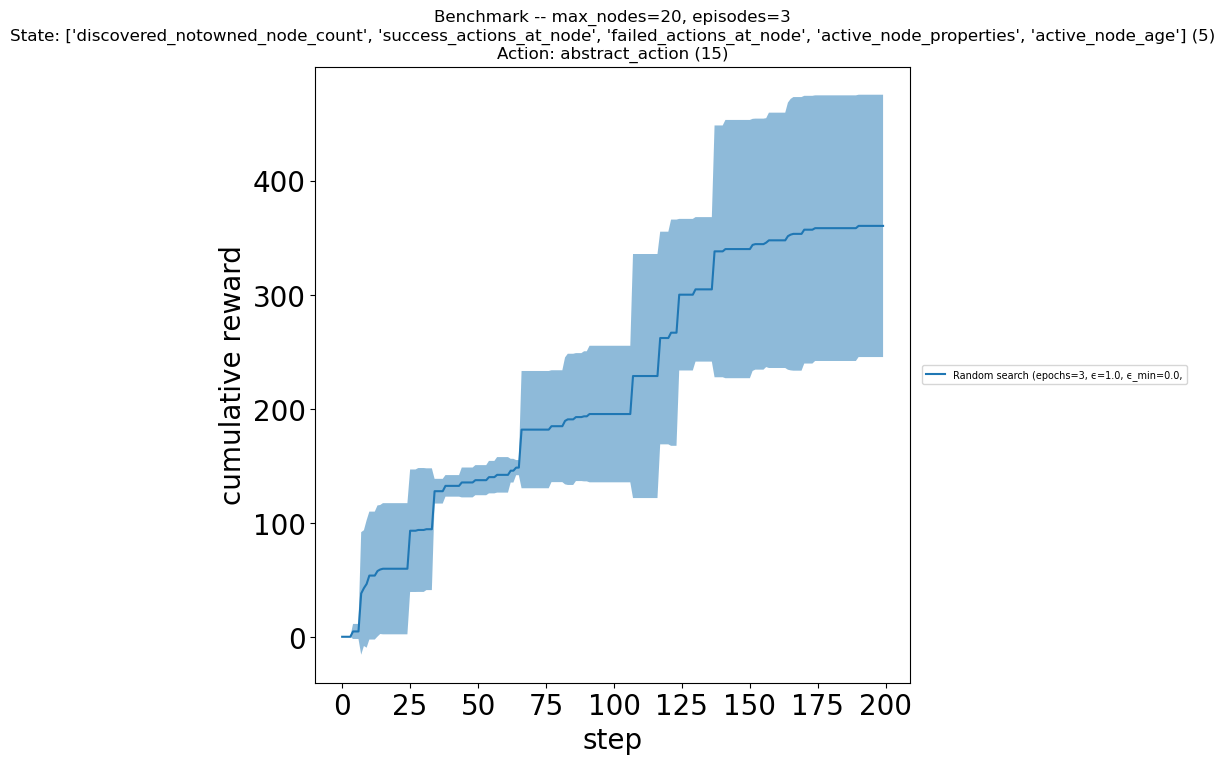

In [9]:
# Compare and plot results for all the agents
all_runs = [
    random_run,
]

# Plot averaged cumulative rewards for DQL vs Random vs DQL-Exploit
themodel = dqla.CyberBattleStateActionModel(ep)
p.plot_averaged_cummulative_rewards(
    all_runs=all_runs,
    title=(
        f"Benchmark -- max_nodes={ep.maximum_node_count}, episodes={eval_episode_count}\n"
        f"State: {[f.name() for f in themodel.state_space.feature_selection]} "
        f"({len(themodel.state_space.feature_selection)})\n"
        f"Action: abstract_action ({themodel.action_space.flat_size()})"
    ),
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumrewards.png"),
)

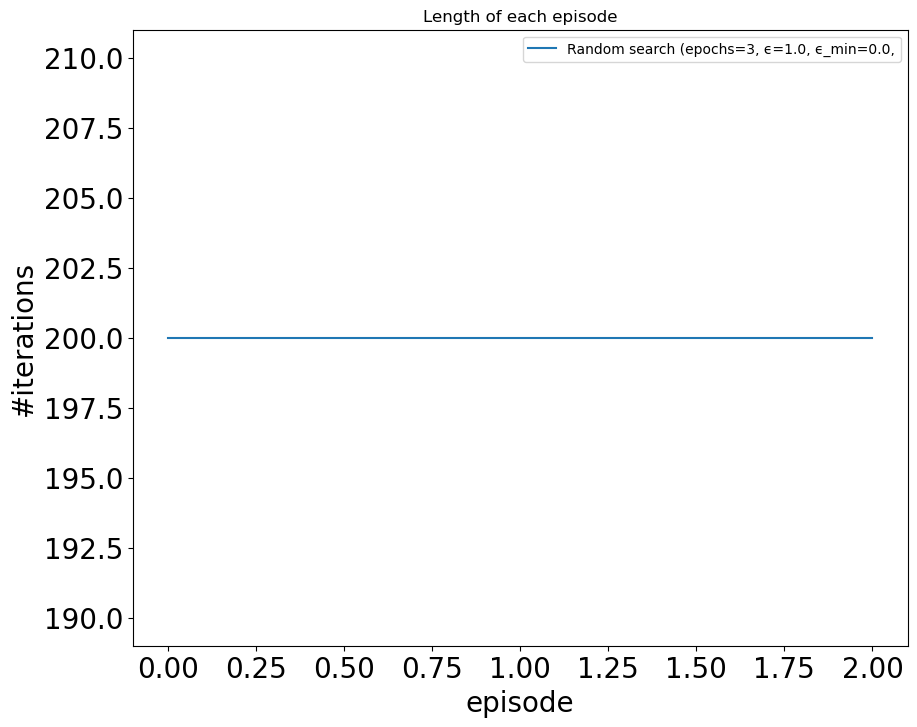

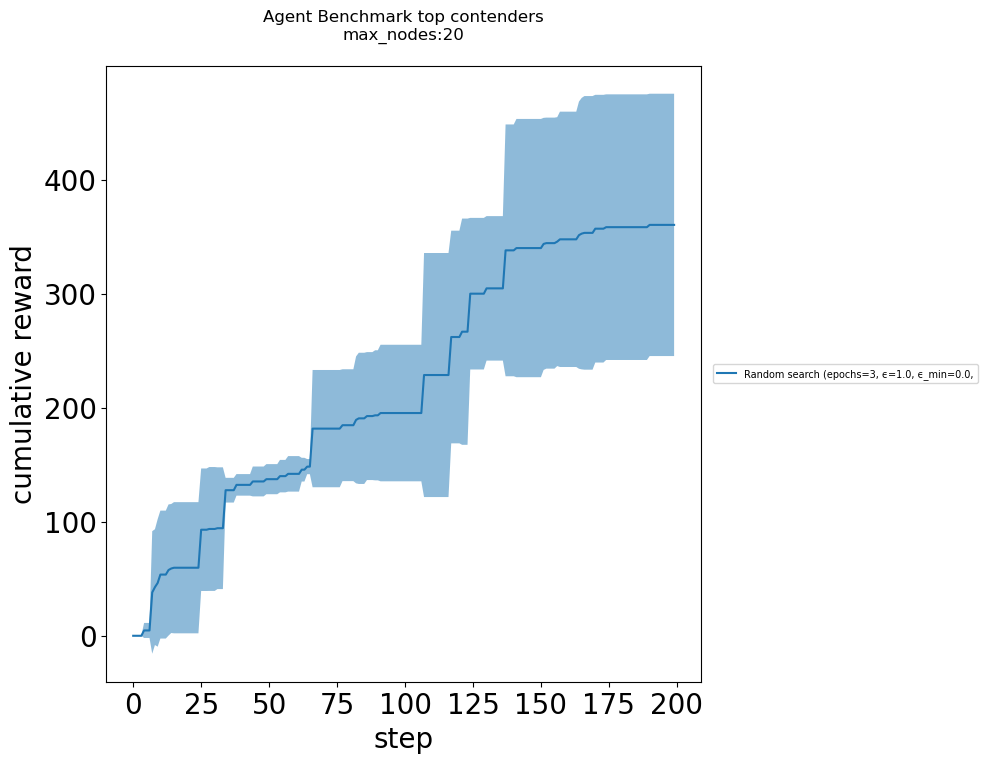

In [10]:
contenders = [random_run]
p.plot_episodes_length(contenders)
p.plot_averaged_cummulative_rewards(
    title=f"Agent Benchmark top contenders\nmax_nodes:{ep.maximum_node_count}\n",
    all_runs=contenders,
    save_at=os.path.join(plots_dir, f"benchmark-{gymid}-cumreward_contenders.png"),
)

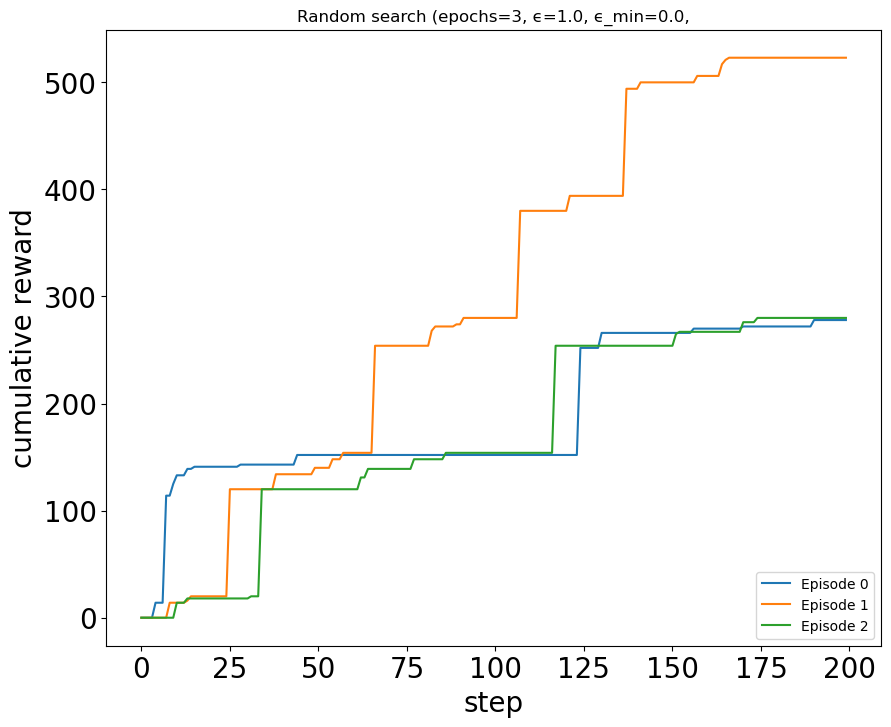

In [11]:
# Plot cumulative rewards for all episodes
for r in contenders:
    p.plot_all_episodes(r)